# 总结下关于matplotlib的知识

In [7]:
import math
import copy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product

In [8]:
# 初始化数据
seasons = [1,2,3,4]   # 季度
stock1 = [4,8,2,6]    # 股票1每个季度对应的股价
stock2 = [10,12,5,3]  # 股票2每个季度对应的股价

#转化数据为Numpy数组（可跳过）
seasons = np.array(seasons)
stock1 = np.array(stock1)
stock2 = np.array(stock2)

In [9]:
# 一些基本设置
# 设置支持中文字体（黑体）
matplotlib.rcParams['font.family'] = ['Heiti TC']
# 设置图片清晰度（200dpi: 200像素每英寸）
matplotlib.rcParams['figure.dpi'] = 200
# 图画面板调整为白色
matplotlib.rcParams['axes.facecolor']='white'
matplotlib.rcParams['savefig.facecolor']='white'

## 1. 对象结构

### 对象类型

(matplotlib.figure.Figure,
 matplotlib.axes._axes.Axes,
 matplotlib.figure.Figure,
 matplotlib.axes._axes.Axes)

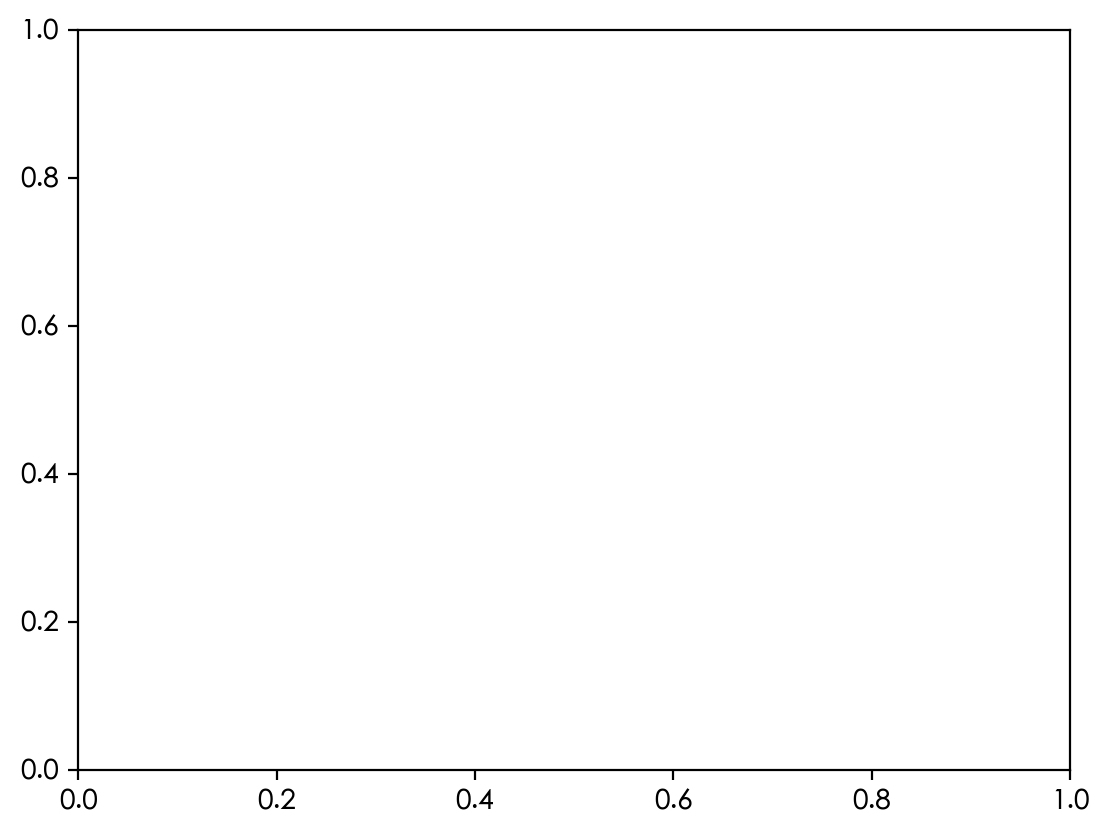

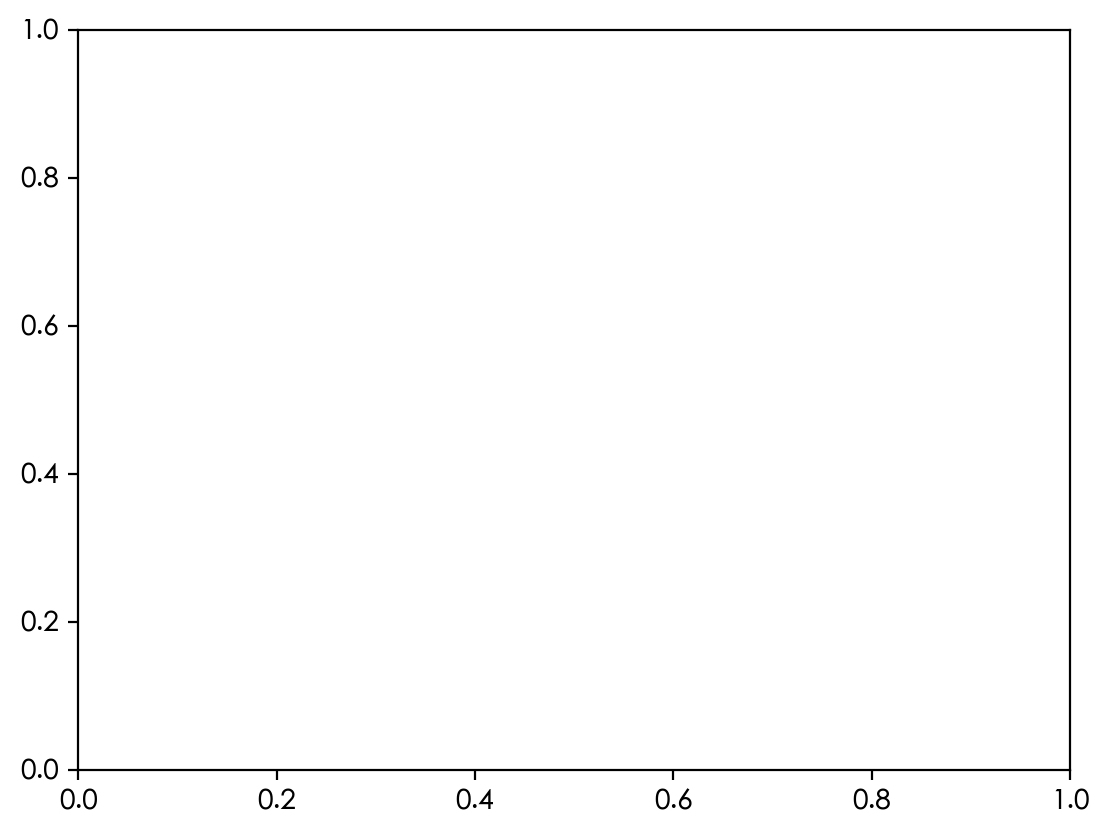

In [10]:
# 可以单独创建figure、aexs对象，也可以通过plt.subplots同时创建，一般我们选择同时创建
fig = plt.figure()
axes = plt.subplot()
fig1, axes1 = plt.subplots()
type(fig), type(axes), type(fig1), type(axes1)

### 基础构造常用参数，构造2*5=10个 axes 的 figure：

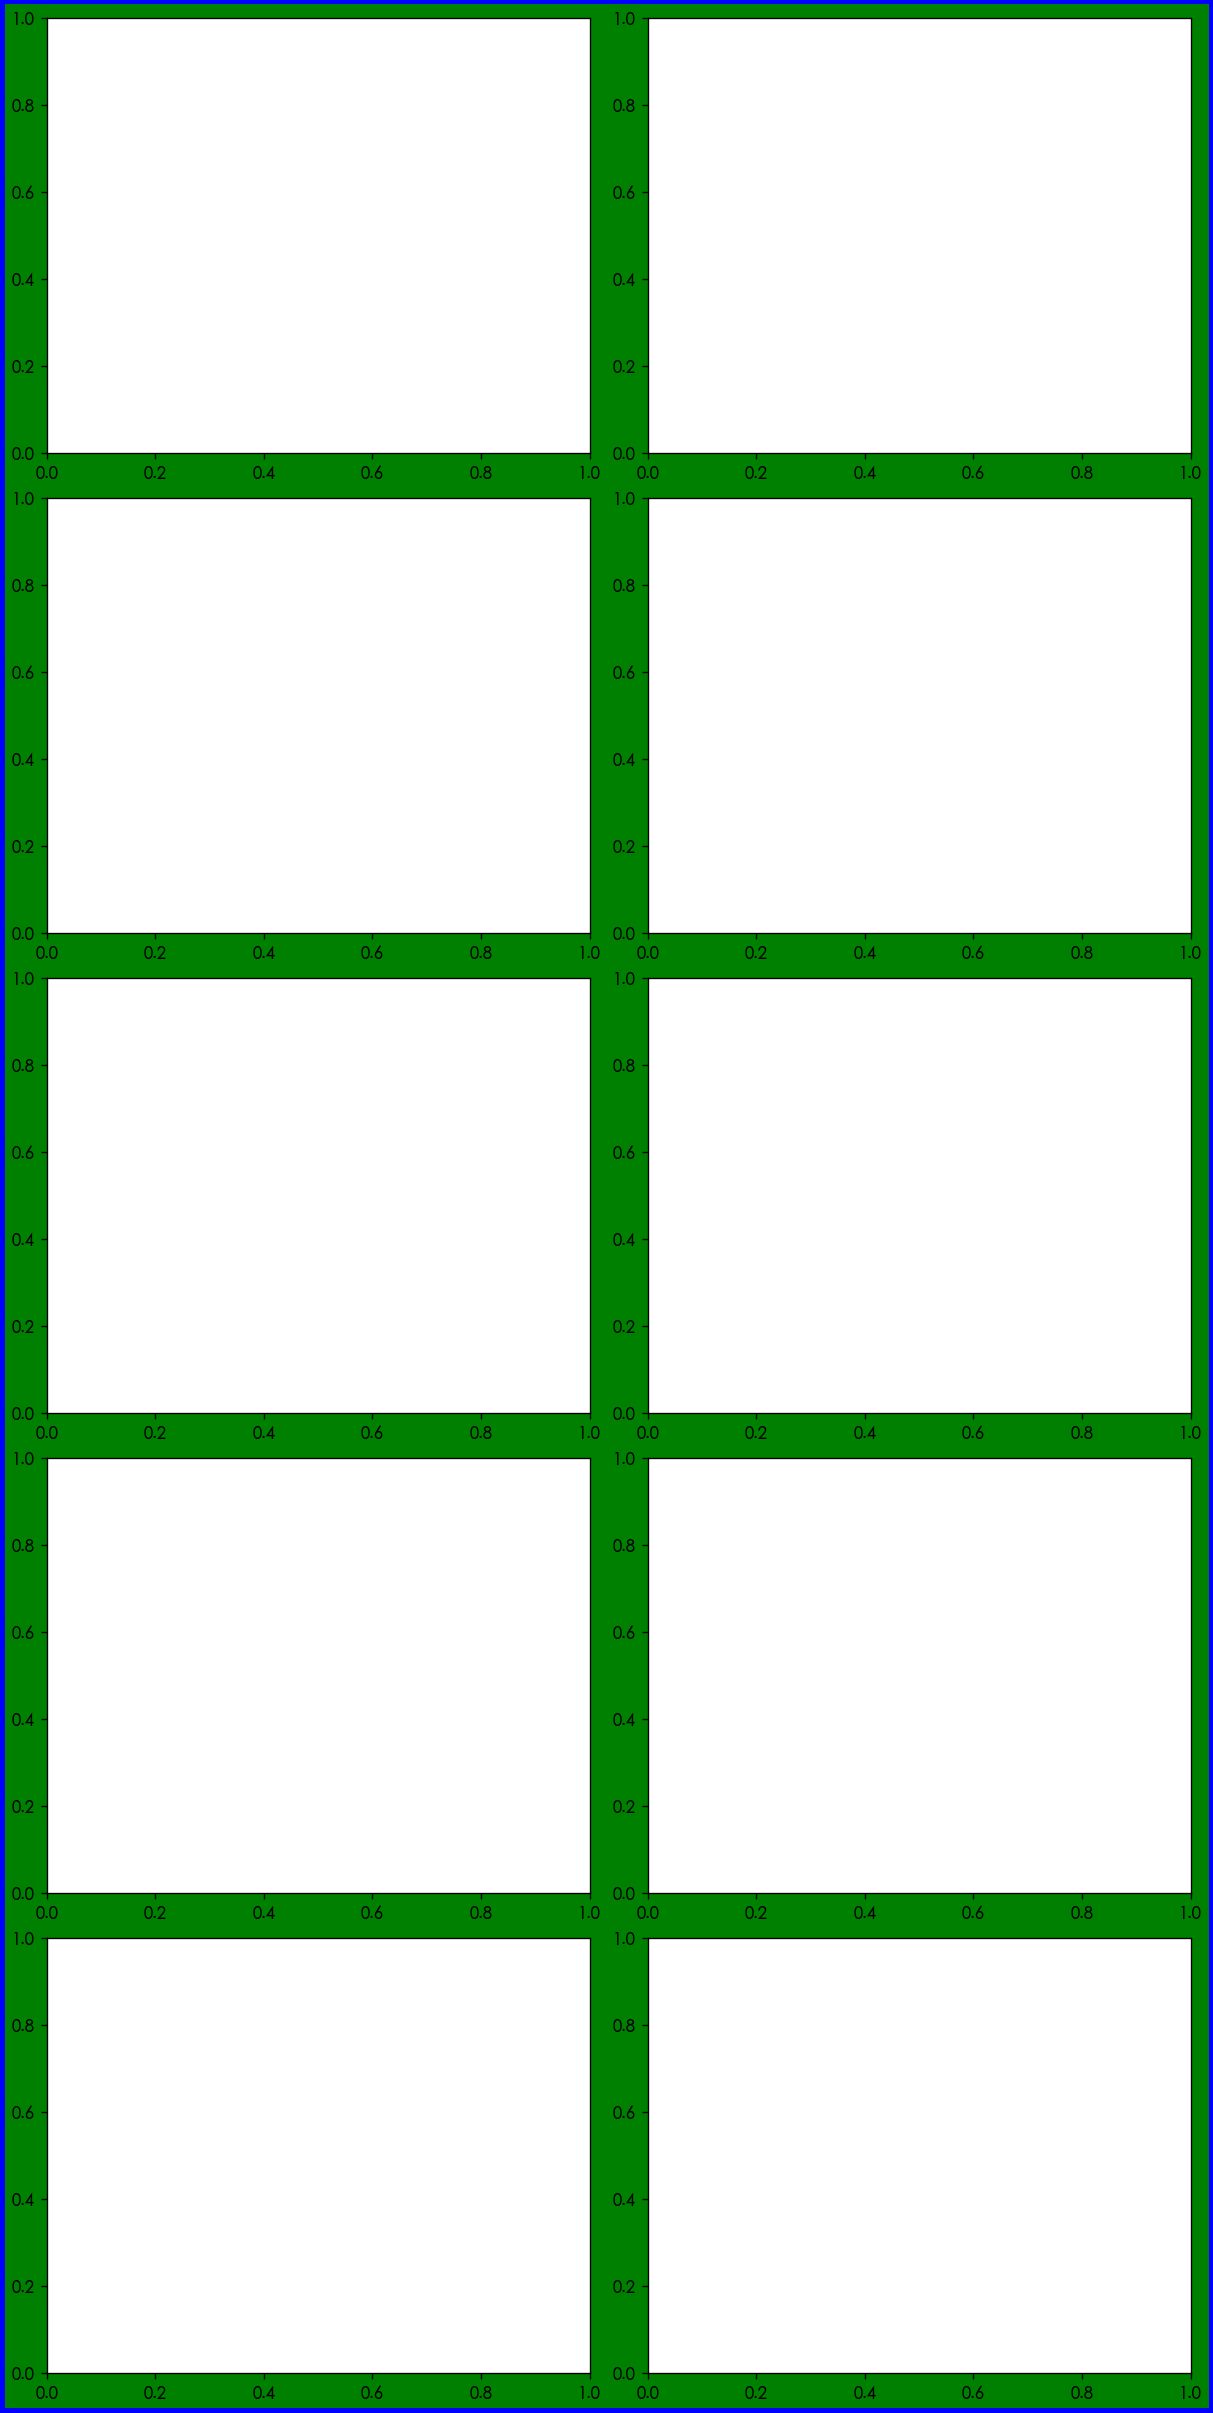

In [47]:
fig, axes = plt.subplots(nrows=5,
                         ncols=2, 
                         figsize=[10,20], # 宽度和高度
                         facecolor="green",
                         linewidth=5,  # 图像的边框宽度
                         edgecolor="blue", # 图像边框的颜色
                         dpi=120, # 图像分辨率，默认为100
                         layout='constrained',
                         sharex=False, # 共享x轴坐标系
                         sharey=False) # 共享y轴坐标系

### 1. 直方图

In [48]:
matplotlib.rcParams['axes.titlesize'], matplotlib.rcParams["axes.titlelocation"], \
matplotlib.rcParams["axes.titley"], matplotlib.rcParams["axes.titlecolor"], 

('large', 'left', None, 'blue')

In [49]:
# 可以改变参数从而改变格式，例如改变图像标题默认位置
matplotlib.rcParams["axes.titlelocation"] = 'left'

In [50]:
# 查看目前图片的坐标
axes[0, 0].get_xticks(), axes[0, 0].get_yticks()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]))

In [51]:
axes[0, 1]

<Axes: >

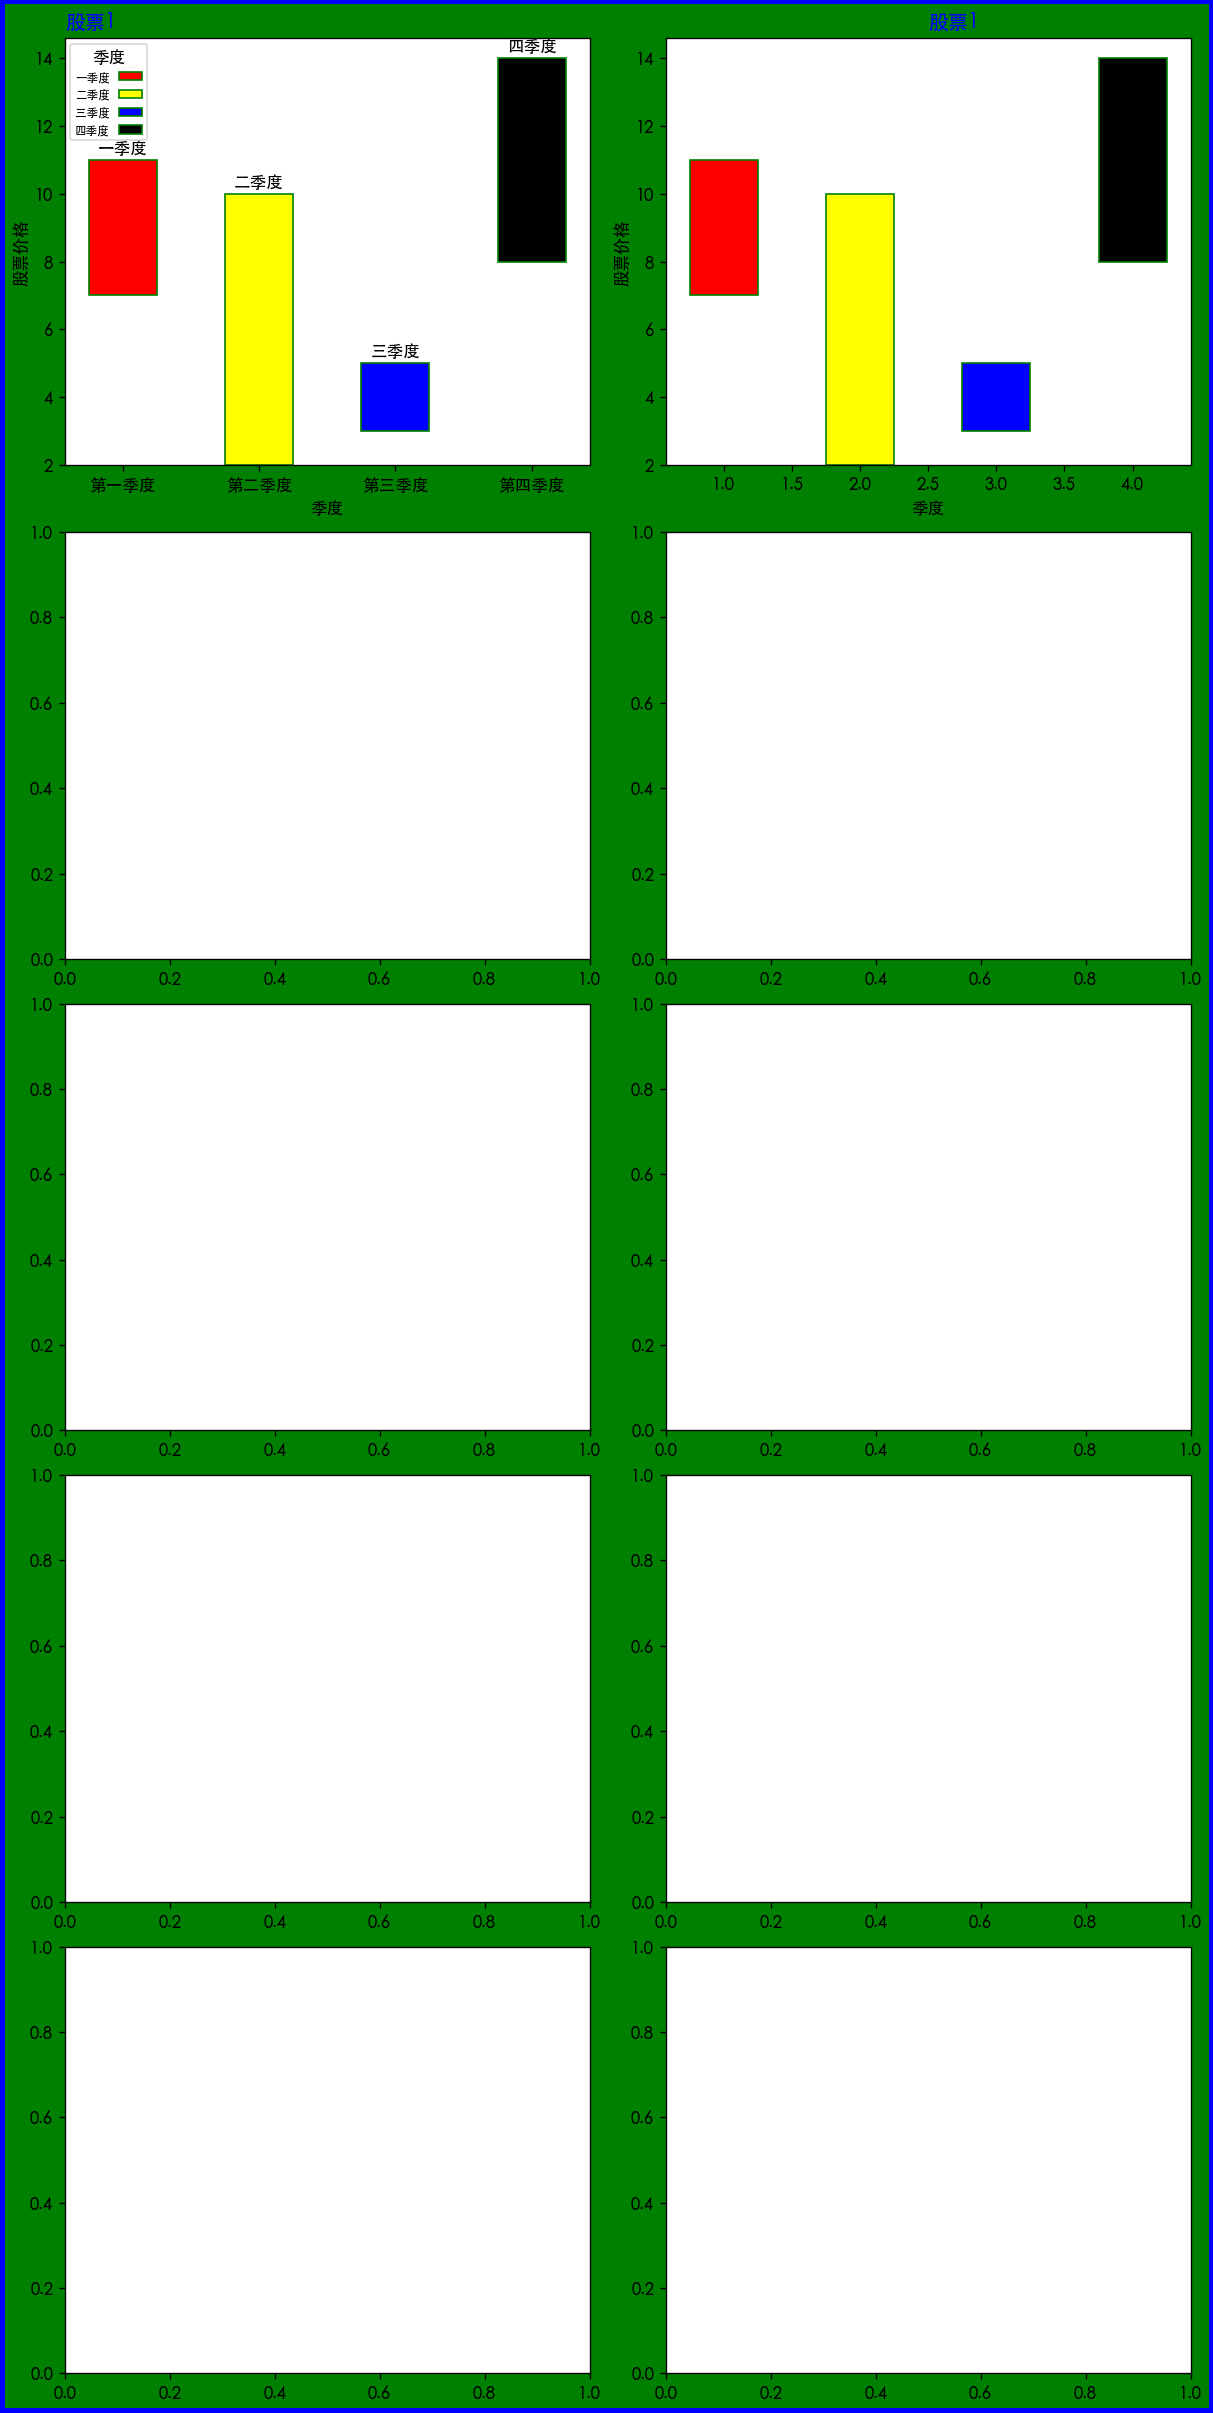

In [52]:
# 为了避免重叠，在画图之前先将子图清空，只留下坐标轴
for i, j in product([0],[0, 1]):
    axes[i, j].clear()

color = ['red', 'yellow', 'blue', 'black']
# fontdict用来改变title格式，默认值如下：
matplotlib.rcParams["axes.titlecolor"] = 'blue'
fontdict = {'fontsize': matplotlib.rcParams['axes.titlesize'],
            'fontweight': matplotlib.rcParams['axes.titleweight'],
            'color': matplotlib.rcParams['axes.titlecolor'],
            'verticalalignment': 'baseline',
            'horizontalalignment': 'left'} 
tick_label=['第一季度', '第二季度', '第三季度', '第四季度']
label=['一季度', '二季度', '三季度', '四季度']
x = axes[0, 0].bar(x=seasons, # bar的x坐标
                   height=stock1, 
                   width=0.5, # bar的宽度
                   color=color, # bar的颜色
                   bottom=[7, 2, 3, 8], # 表示bar的底端起始坐标，这里只是举一个例子，不够美观
                   align='center', # 表示bar在x轴上的位置
                   linewidth=1,  # bar的边框宽度
                   edgecolor='green', # bar的边框颜色
                   label=label # 每个bar的标签，用来显示图例
                   )

# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
# 标题可以通过调整rcParams参数来改变，也可以直接指定参数来调整单幅图的参数。
axes[0, 0].set_title(label='股票1',
                     fontdict=fontdict)
axes[0, 0].set_ylabel('股票价格')
axes[0, 0].set_xlabel('季度')

axes[0, 0].bar_label(container=x,
                     labels=label, #指定标签内容，如果不指定，那么默认bar的数值大小作为标签
                     padding=3) # 标签距离bar的位置
# tick代表坐标轴上的一个“短线”。set_xticks可以设置坐标轴上“短线”的位置以及名称。
# 注意：这一步最好保证xticks和bar的x参数位置相同，同时建议：标签在这里指定，不在bar里面指定
axes[0, 0].set_xticks(ticks=np.arange(len(seasons)) + 1,
                      labels=tick_label)
# 注意：之前在bar函数的参数中需要指定label，这里才能显示图例
# label和tick_label可以不一样，分别代表每个bar的标签（用于图例）以及坐标轴上的坐标的名称。
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html
axes[0, 0].legend(title='季度', 
                  loc='best',
                  fontsize='x-small',
                  markerfirst=False) # 图例和label的相对位置

axes[0, 1].bar(x=seasons, # bar的x坐标
               height=stock1, 
               width=0.5, # bar的宽度
               color=color, # bar的颜色
               bottom=[7, 2, 3, 8], # 表示bar的底端起始坐标，这里只是举一个例子，不够美观
               align='center', # 表示bar在x轴上的位置
               linewidth=1,  # bar的边框宽度
               edgecolor='green', # bar的边框颜色
               )

# 直接指定部分参数
axes[0, 1].set_title(label='股票1',
                     loc='center',
                     fontdict=fontdict,
                     y=1)   # 标题的y坐标位置 
axes[0, 1].set_ylabel(ylabel='股票价格')
axes[0, 1].set_xlabel(xlabel='季度')

fig

### 2. 折线图

In [76]:
# 查看目前图片的坐标
axes[1, 0].get_xticks(), axes[1, 0].get_yticks()

(array([1, 2, 3, 4]), array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]))

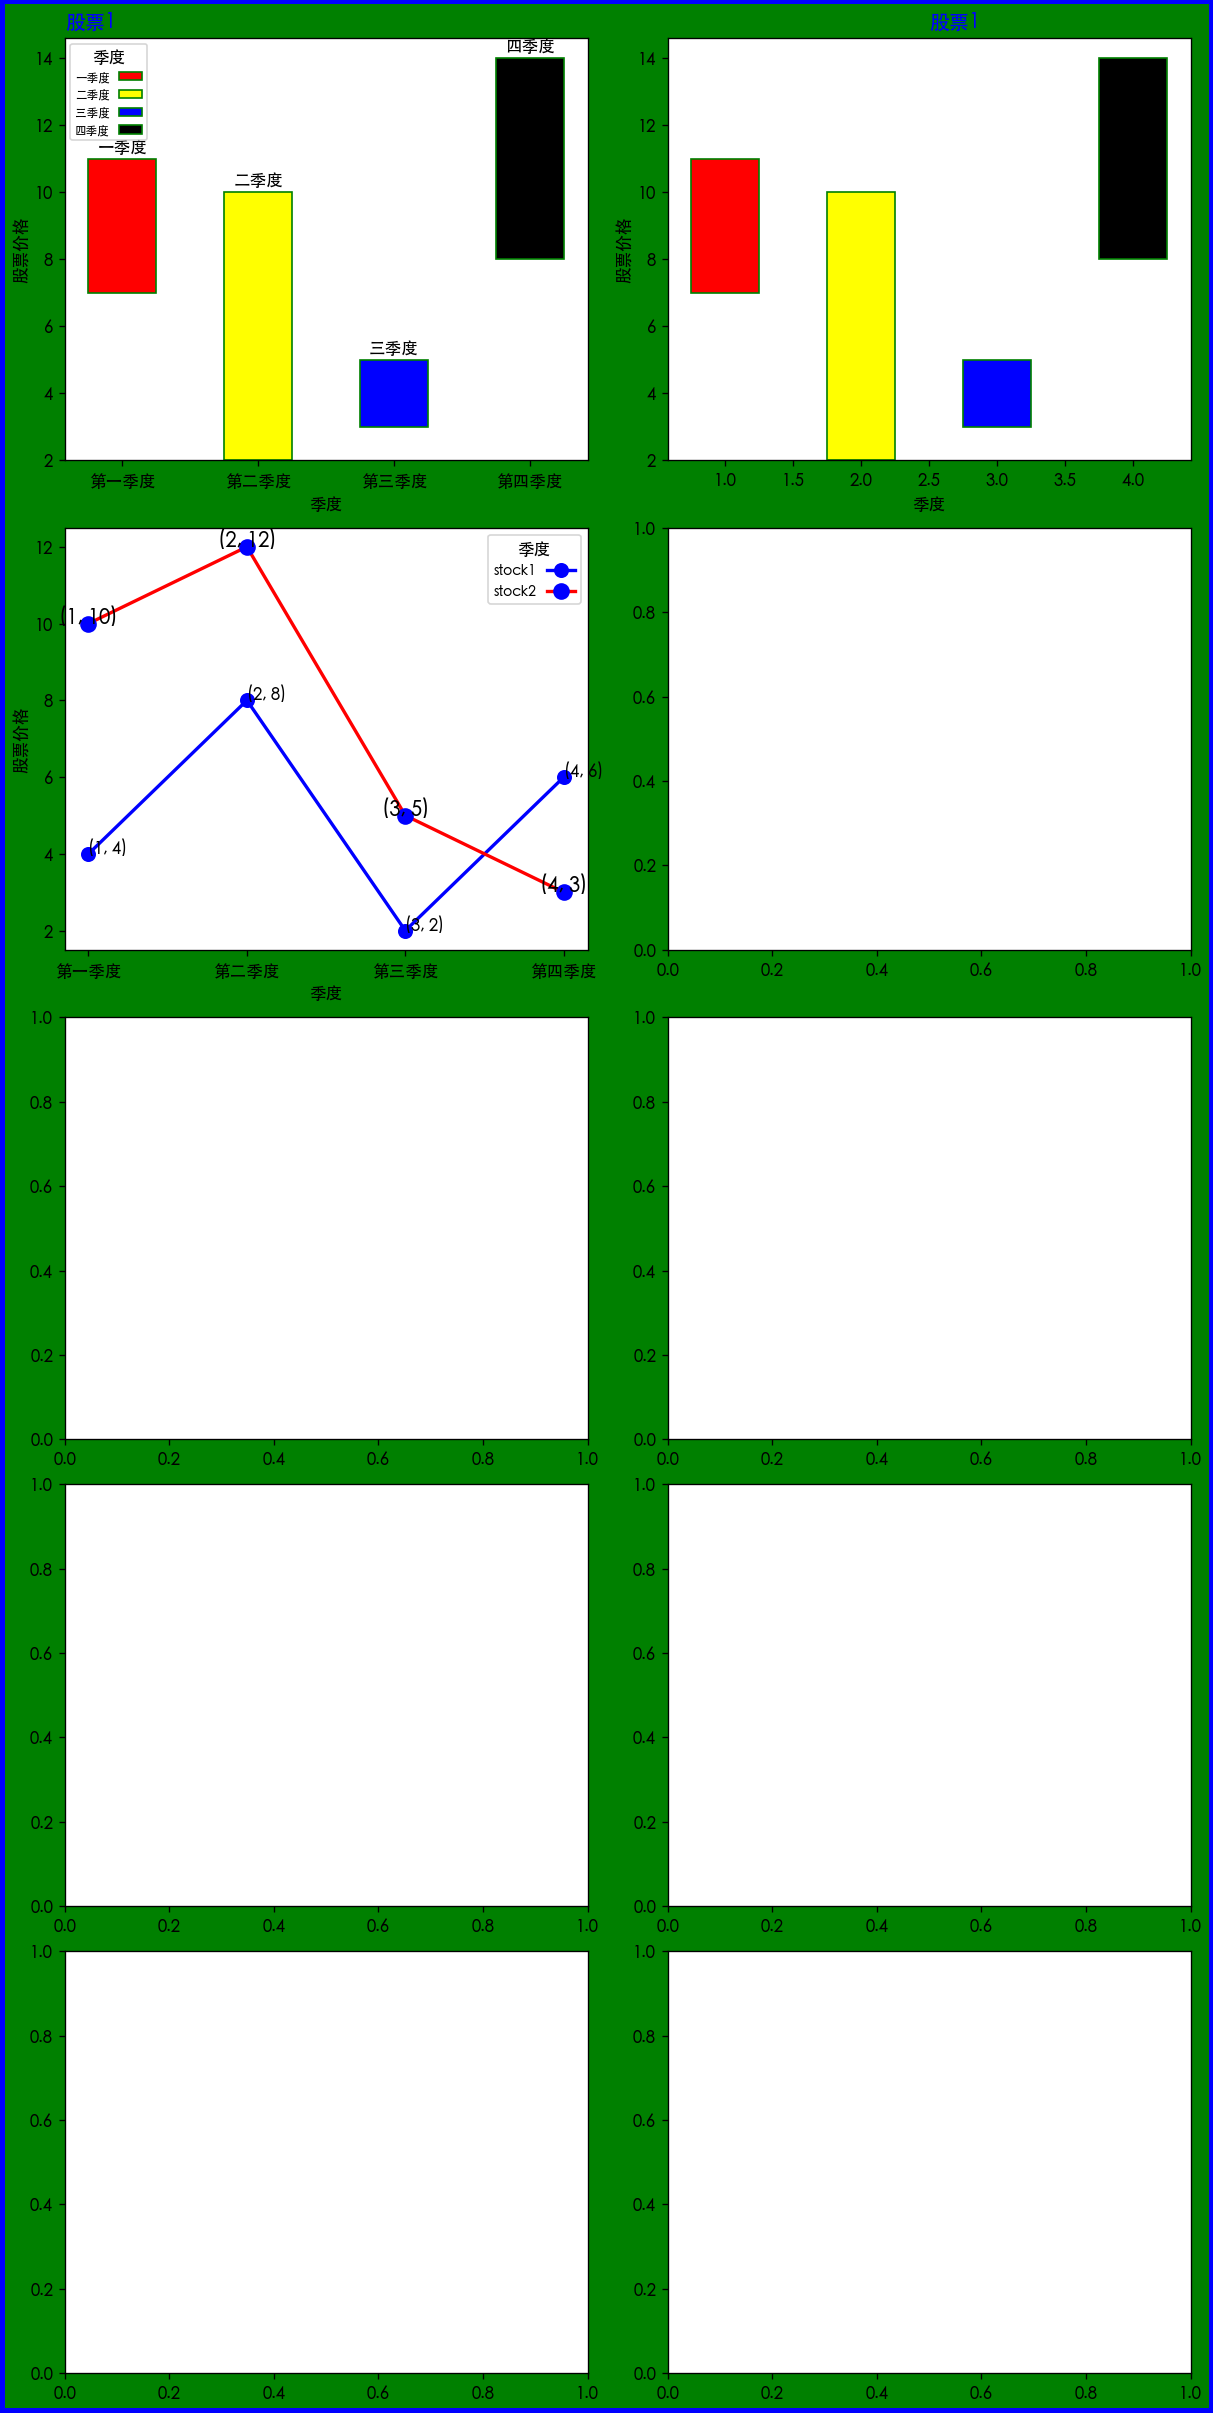

In [94]:
# 为了避免重叠，在画图之前先将子图清空，只留下坐标轴
for i, j in product([1],[0, 1]):
    axes[i, j].clear()

tick_label=['第一季度', '第二季度', '第三季度', '第四季度']
label=['一季度', '二季度', '三季度', '四季度']

# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html
# 注意，axes.plot的语法不包含参数名称
axes[1, 0].plot(seasons, # x坐标
                stock1, # y坐标
                'o-b', # fmt = '[marker][line][color]'
                label='stock1',
                linewidth=2,
                markersize=8)
axes[1, 0].plot(seasons, # x坐标
                stock2, # y坐标
                'o-r', # fmt = '[marker][line][color]'
                label='stock2',
                linewidth=2,
                markersize=10,
                markeredgewidth=0,   # 标记点边框的大小
                markerfacecolor='blue') # 如果将边框设置为0，那么face的颜色就是标记点的颜色

axes[1, 0].set_ylabel(ylabel='股票价格')
axes[1, 0].set_xlabel(xlabel='季度')

axes[1, 0].legend(title='季度', 
                  loc='best',
                  fontsize='small',
                  markerfirst=False) # 图例和label的相对位置
axes[1, 0].set_xticks(ticks=np.arange(len(seasons)) + 1,
                      labels=tick_label)

# 添加文本的位置就是标记点marker的位置，由x，y坐标决定
for x, y in zip(axes[1, 0].get_xticks(), stock1):
    axes[1, 0].text(x, y, 
                    s='(%.0d, %.0d)' %(x, y), 
                    size=10)
for x, y in zip(axes[1, 0].get_xticks(), stock2):
    axes[1, 0].text(x, y, 
                    s='(%.0d, %.0d)' %(x, y), 
                    size=12,
                    horizontalalignment='center',
                    verticalalignment='baseline')
# axes[1, 1].remove()
fig

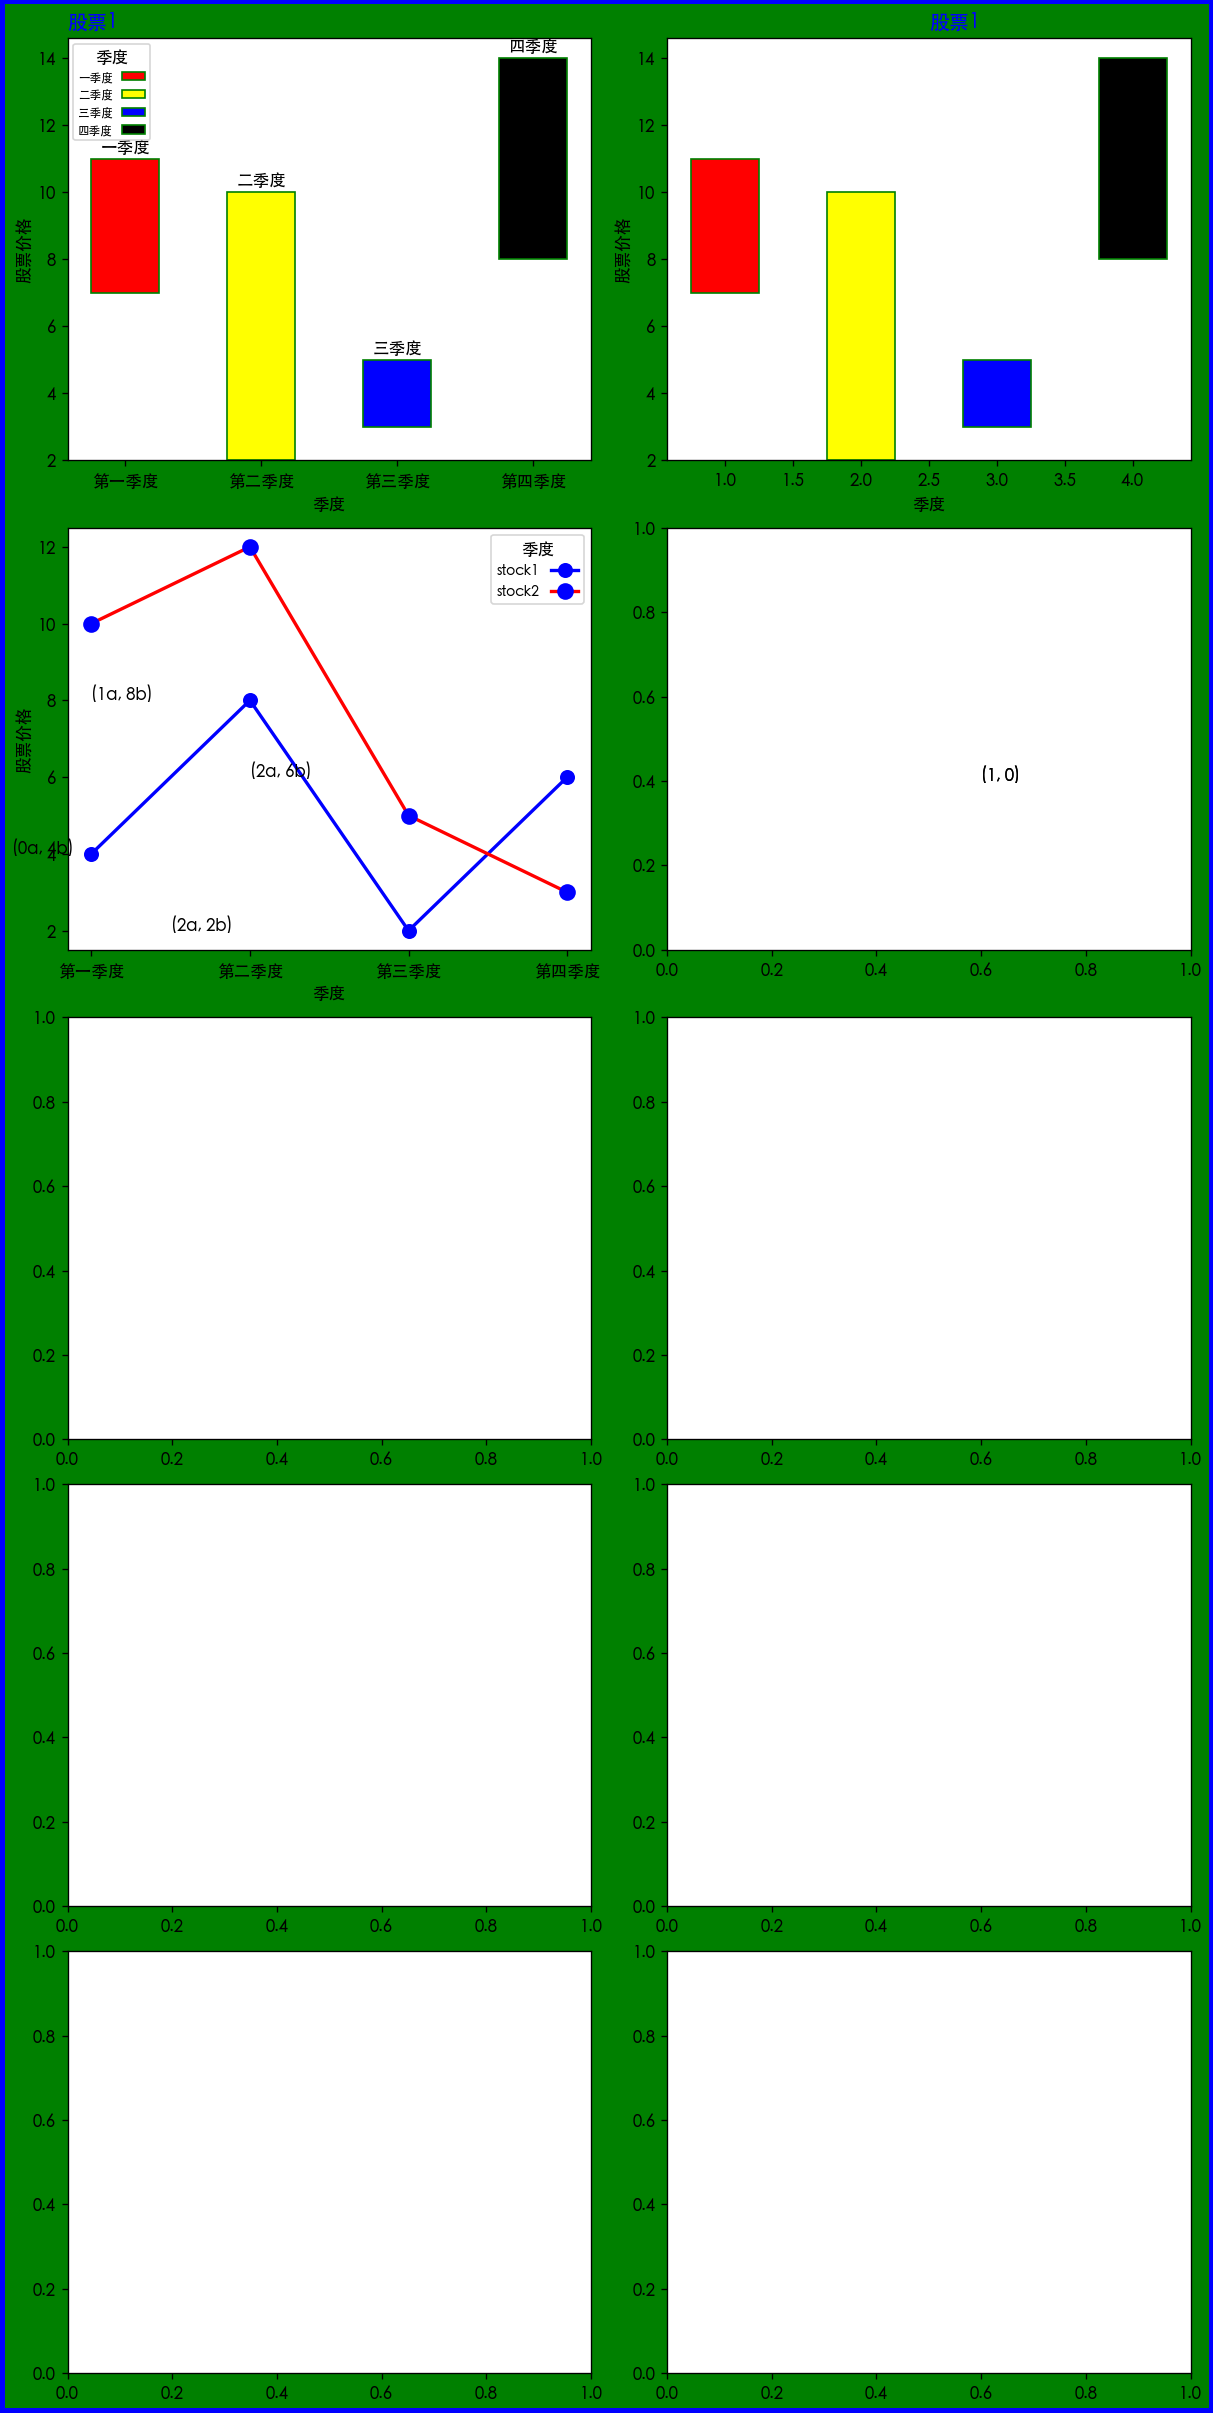

In [72]:
axes[1, 1].text(0.6, 0.4, 
                    s='(%.0f, %.0f)' %(0.6, 0.4), 
                    size=10)
fig

### 3. 散点图

In [ ]:
# 为了避免重叠，在画图之前先将子图清空，只留下坐标轴
# axes被remove后，clear自动不执行
for i, j in product([2],[0, 1]):
    axes[i, j].clear()

tick_label=['第一季度', '第二季度', '第三季度', '第四季度']
label=['一季度', '二季度', '三季度', '四季度']

# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html
# 注意，axes.plot的语法不包含参数名称
axes[2, 0].scatter(x=seasons, # x坐标
                   y=stock1, # y坐标
                   s=[10, 20, 50, 100], # 散点的大小
                   c=['r', 'b', 'c', 'y']) # 散点的颜色
axes[2, 0].scatter(x=seasons, # x坐标
                   y=stock2, # y坐标
                   s=[10, 20, 50, 100], # 散点的大小
                   c=['r', 'b', 'c', 'y']) # 散点的颜色

axes[2, 0].set_ylabel(ylabel='股票价格')
axes[2, 0].set_xlabel(xlabel='季度')

axes[2, 0].set_xticks(ticks=np.arange(len(seasons)) + 1,
                      labels=tick_label)

fig

### 4. 饼图

In [ ]:
# 为了避免重叠，在画图之前先将子图清空，只留下坐标轴
# axes被remove后，clear自动不执行
for i, j in product([3],[0, 1]):
    axes[i, j].clear()

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
axes[3, 0].pie(x=sizes, 
               labels=labels,
               autopct='%1.2f%%', # 自动计算百分比并显示，传入一个format func来控制百分比显示的格式
               labeldistance=0.6, # label的位置
               pctdistance=1.25) # 百分比的位置

explode=[0, 0.1, 0.2, 0]
axes[3, 1].pie(x=sizes, 
               labels=labels,
               autopct='%1.2f%%', # 自动计算百分比并显示，传入一个format func来控制百分比显示的格式
               labeldistance=0.6, # label的位置
               pctdistance=1.25,
               explode=explode, # 分裂
               shadow=True, # 分裂后的阴影
               startangle=-90) # 饼图第一块逆时针旋转的开始角度，默认为0度，负数代表顺时针
fig

# 2. 一些例子

## 1. stacked bar chart

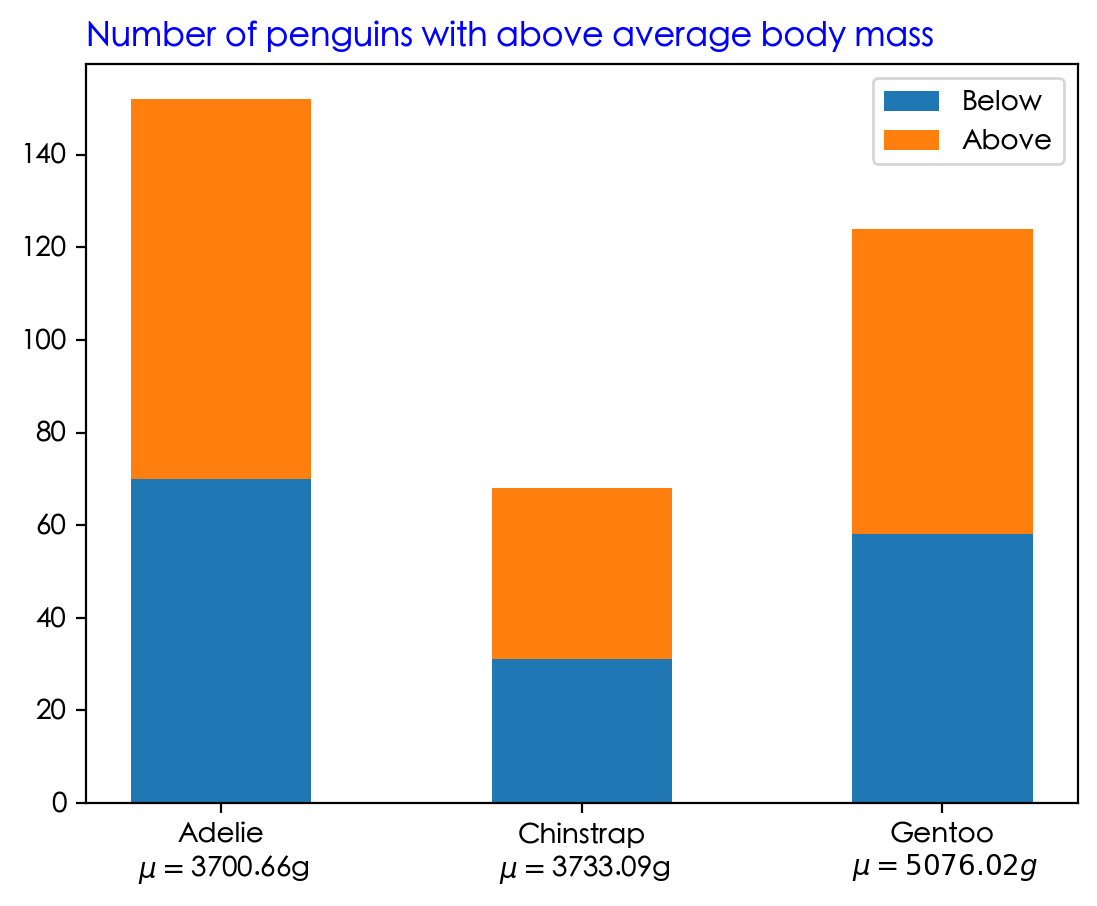

In [476]:
import matplotlib.pyplot as plt
import numpy as np

# data from https://allisonhorst.github.io/palmerpenguins/

species = (
    "Adelie\n $\\mu=$3700.66g",
    "Chinstrap\n $\\mu=$3733.09g",
    "Gentoo\n $\\mu=5076.02g$",
)
weight_counts = {
    "Below": np.array([70, 31, 58]),
    "Above": np.array([82, 37, 66]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of penguins with above average body mass")
ax.legend(loc="upper right")

plt.show()